<a href="https://colab.research.google.com/github/gh-ita/SafetyScan/blob/main/PPE_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data analysis and preprocessing**

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [33]:
!pip install pyyaml

In [ ]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [36]:
from roboflow import Roboflow
import os
import matplotlib.pyplot as plt
from ultralytics.data.utils import visualize_image_annotations
import yaml

In [30]:
rf = Roboflow(api_key="AonDlnwLMihldiyHw3P9")
project = rf.workspace("bib-detection-ogsde").project("construction-site-safety-lvvcj")
version = project.version(5)
dataset = version.download("darknet")


loading Roboflow workspace...
loading Roboflow project...


Based on the yaml file, there is a redundancy in the annotation classes **Harhat - Helmet**,  **NO-Hardhat - NO-Helmet**

{0: 'Gloves', 1: 'Goggles', 2: 'Helmet', 3: 'Mask', 4: 'No-Gloves', 5: 'No-Goggles', 6: 'No-Helmet', 7: 'No-Mask', 8: 'No-Safety_Vest', 9: 'Person', 10: 'Safety_Vest'}


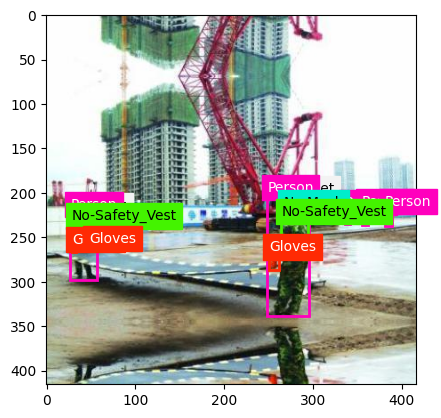

In [38]:
with open("/content/Construction-Site-Safety-5/data.yaml","r") as file:
  data = yaml.safe_load(file)
class_list = data['names']
label_map = {i: name for i, name in enumerate(class_list)}
print(label_map)
visualize_image_annotations(image_path = "/content/Construction-Site-Safety-5/valid/images/-1079-_png_jpg.rf.b0d3350f633d6fd91ed89d052874b5e2.jpg", label_map = label_map,txt_path="/content/Construction-Site-Safety-5/valid/labels/-1079-_png_jpg.rf.b0d3350f633d6fd91ed89d052874b5e2.txt")

###**Dataset splits**

In [ ]:
train_images_list = os.listdir('/content/Construction-Site-Safety-5/train/images')
train_images_count = len(train_images_list)
print(f"The total count of training images : {train_images_count}")
print(f"The percentage of training images : {train_images_count/1017*100}")

The total count of training images : 739
The percentage of training images : 72.66470009832841


In [ ]:
test_images_list = os.listdir('/content/Construction-Site-Safety-5/test/images')
test_images_count = len(test_images_list)
print(f"The total count of test images : {test_images_count}")
print(f"The percentage of test images : {test_images_count/1017*100}")

The total count of test images : 102
The percentage of test images : 10.029498525073747


In [ ]:
valid_images_list = os.listdir('/content/Construction-Site-Safety-5/valid/images')
valid_images_count = len(valid_images_list)
print(f"The total count of validation images : {valid_images_count}")
print(f"The percentage of validation images : {valid_images_count/1017*100}")

The total count of validation images : 176
The percentage of validation images : 17.305801376597838


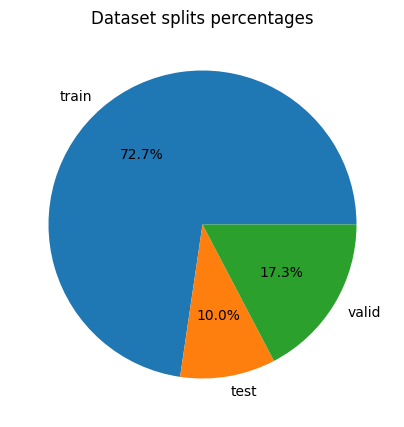

In [ ]:
#Data
labels = ["train","test","valid"]
sizes = [72.6,10,17.3]
#Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Dataset splits percentages")
plt.show()

In [78]:
total_annotations = sum(class_count.values())
print(f"Total annotations : {total_annotations}")

Total annotations : 5210


###**Dataset classes**

In [65]:
def count_annotations(file_path, count_dict):
       first_elements = []
       with open(file_path, 'r') as file:
           for line in file:
               elements = line.strip().split()
               if elements:
                   id = int(elements[0])
                   if id in count_dict:
                      count_dict[id] += 1

In [66]:
class_count = {i:0 for i in label_map.keys()}
train_annot_list = os.listdir('/content/Construction-Site-Safety-5/train/labels')
test_annot_list = os.listdir('/content/Construction-Site-Safety-5/test/labels')
valid_annot_list = os.listdir('/content/Construction-Site-Safety-5/valid/labels')
for i in train_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/train/labels/{i}",class_count)
for i in test_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/test/labels/{i}",class_count)
for i in valid_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/valid/labels/{i}",class_count)
print(class_count)

{0: 296, 1: 205, 2: 583, 3: 202, 4: 241, 5: 261, 6: 696, 7: 491, 8: 582, 9: 1229, 10: 424}


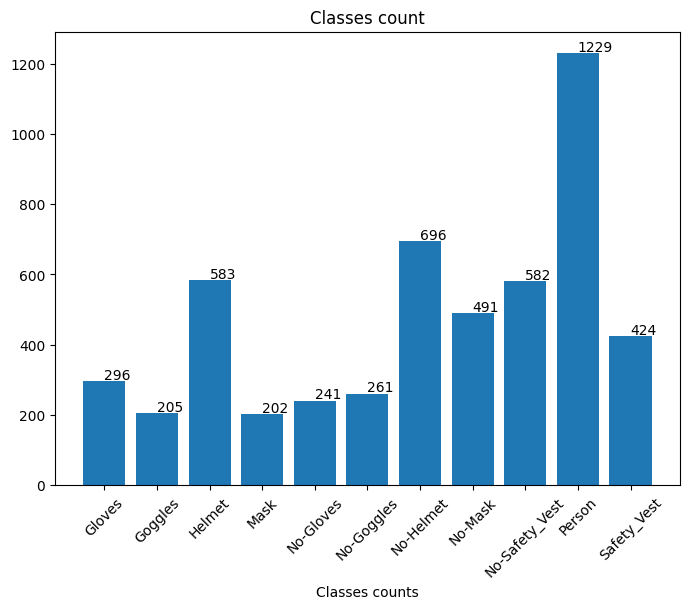

In [68]:
class_count_list = list(class_count.values())
class_label_list = list(label_map.values())
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i])
plt.figure(figsize=(7,6))
plt.bar(class_label_list,class_count_list)
add_labels(class_label_list,class_count_list)
plt.title("Classes count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("Classes counts")
plt.show()

In [71]:
test_class_count = {i:0 for i in label_map.keys()}
valid_class_count = {i:0 for i in label_map.keys()}
train_class_count = {i:0 for i in label_map.keys()}
train_annot_list = os.listdir('/content/Construction-Site-Safety-5/train/labels')
test_annot_list = os.listdir('/content/Construction-Site-Safety-5/test/labels')
valid_annot_list = os.listdir('/content/Construction-Site-Safety-5/valid/labels')
for i in train_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/train/labels/{i}",train_class_count)
for i in test_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/test/labels/{i}",test_class_count)
for i in valid_annot_list:
  count_annotations(f"/content/Construction-Site-Safety-5/valid/labels/{i}",valid_class_count)
print(train_class_count)

{0: 231, 1: 148, 2: 394, 3: 153, 4: 180, 5: 186, 6: 498, 7: 338, 8: 386, 9: 848, 10: 322}


####**Training data classes**

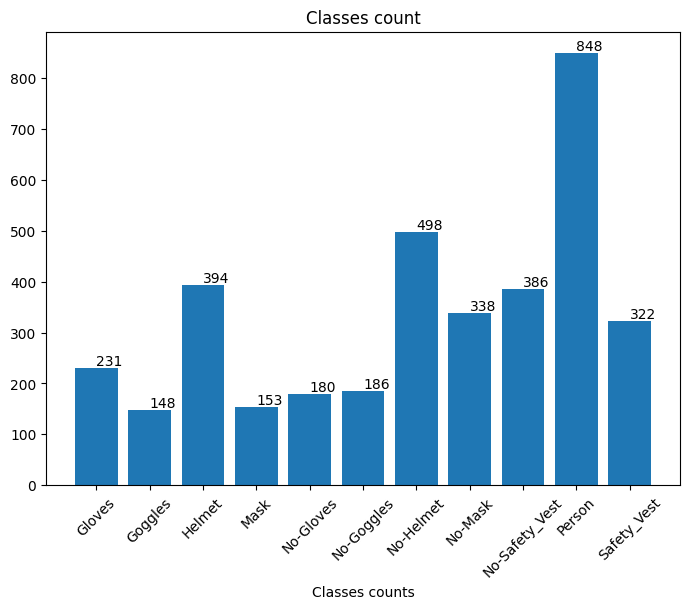

In [72]:
train_class_count_list = list(train_class_count.values())
class_label_list = list(label_map.values())
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i])
plt.figure(figsize=(7,6))
plt.bar(class_label_list,train_class_count_list)
add_labels(class_label_list,train_class_count_list)
plt.title("Classes count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("Train classes counts")
plt.show()

####**Test data classes**

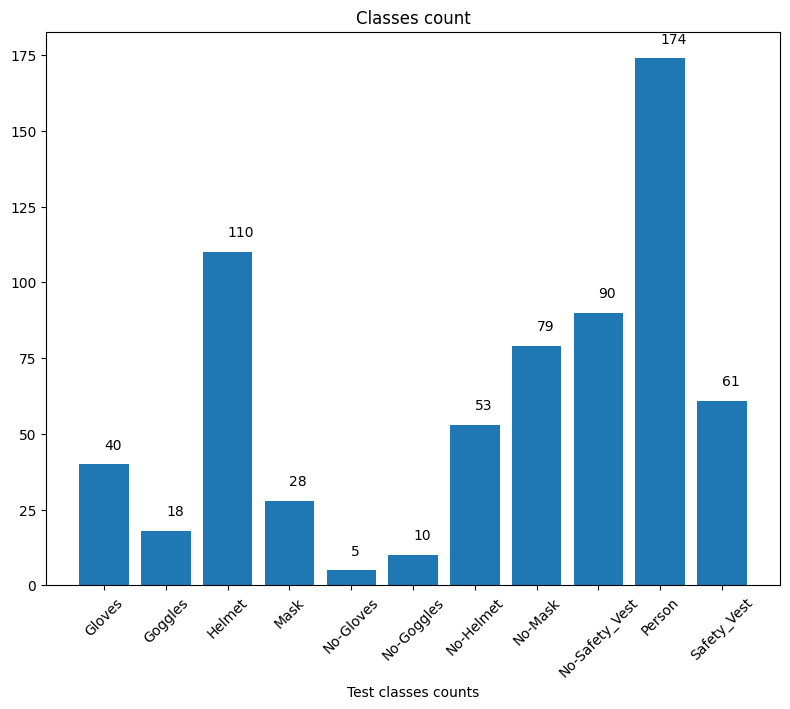

In [74]:
test_class_count_list = list(test_class_count.values())
class_label_list = list(label_map.values())
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i])
plt.figure(figsize=(8,7))
plt.bar(class_label_list,test_class_count_list)
add_labels(class_label_list,test_class_count_list)
plt.title("Classes count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("Test classes counts")
plt.show()

####**Validation data classes**

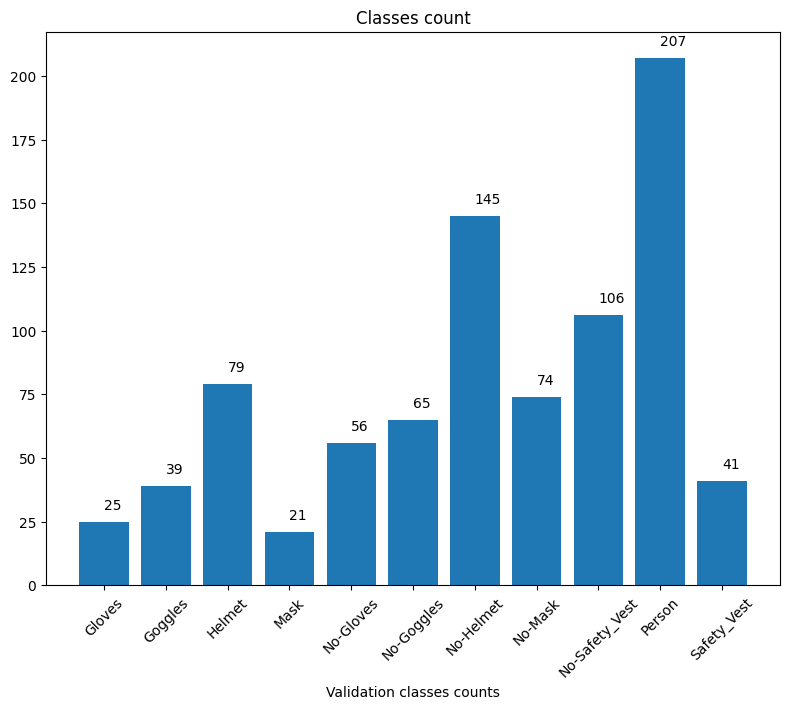

In [76]:
valid_class_count_list = list(valid_class_count.values())
class_label_list = list(label_map.values())
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i])
plt.figure(figsize=(8,7))
plt.bar(class_label_list,valid_class_count_list)
add_labels(class_label_list,valid_class_count_list)
plt.title("Classes count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("Validation classes counts")
plt.show()